In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import random as rd
from statistics import mean

In [5]:
#Data set for Vayyar sensor of person sitting down, idea to populate more would be to perhaps find a range for X,Y,Z axis and just randomize loactations multiple times to "simulate" a person sitting down
sit1 = pd.read_csv(r"C:\Users\migelwlf\Documents\Vayyar\Sensor Recordings\sit1\ApplicationLogs\Tracker_Jun_23_2022__15_21_14.csv")
sit2 = pd.read_csv(r"C:\Users\migelwlf\Documents\Vayyar\Sensor Recordings\sit2\ApplicationLogs\Tracker_Jun_23_2022__15_21_59.csv")
# test3 = pd.read_csv(r"C:\Users\migelwlf\Documents\Vayyar\Sensor Recordings\Sitting_Test_3_Front\ApplicationLogs\Tracker_Jun_21_2022__10_48_16.csv")
# test4 = pd.read_csv(r"C:\Users\migelwlf\Documents\Vayyar\Sensor Recordings\Sitting_Test_4_Front\ApplicationLogs\Tracker_Jun_21_2022__10_53_31.csv")
# test5 = pd.read_csv(r"C:\Users\migelwlf\Documents\Vayyar\Sensor Recordings\Sitting_Test_5_Front\ApplicationLogs\Tracker_Jun_21_2022__11_02_04.csv")
# test6 = pd.read_csv(r"C:\Users\migelwlf\Documents\Vayyar\Sensor Recordings\Sitting_Test_6\ApplicationLogs\Tracker_Jun_21_2022__15_02_59.csv")
# tests1 = pd.read_csv(r"C:\Users\migelwlf\Documents\Vayyar\Sensor Recordings\Sitting_Test_Santi_1\ApplicationLogs\Tracker_Jun_21_2022__13_44_05.csv")
# tests2 = pd.read_csv(r"C:\Users\migelwlf\Documents\Vayyar\Sensor Recordings\Sitting_Test_Santi_2\ApplicationLogs\Tracker_Jun_21_2022__13_45_17.csv")

# stand_test_1 = pd.read_csv(r"C:\Users\migelwlf\Documents\Vayyar\Sensor Recordings\Standing_Test_1\ApplicationLogs\Tracker_Jun_21_2022__15_08_16.csv")

# test1.drop(test1.columns[10:42], axis=1, inplace=True) #removing all columns excluding 1st 6
sit2 = sit2.dropna(axis=1,how='all')
user_sit_2 = sit2['TARGET_ID']
len(sit2.columns)
sit2

,FRAME_NUM,TIME_STAMP,TARGET_ID,TARGET_X,TARGET_Y,TARGET_Z,TARGET_ID.1,TARGET_X.1,TARGET_Y.1,TARGET_Z.1,TARGET_ID.2,TARGET_X.2,TARGET_Y.2,TARGET_Z.2
0,2,Jun-23-2022 15:22:01.917,1,-0.62,1.30,1.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19,Jun-23-2022 15:22:02.028,1,-0.63,1.32,1.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20,Jun-23-2022 15:22:02.139,1,-0.62,1.34,1.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21,Jun-23-2022 15:22:02.250,1,-0.62,1.34,1.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22,Jun-23-2022 15:22:02.362,1,-0.59,1.37,1.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,273,Jun-23-2022 15:22:30.251,2,0.25,1.25,1.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,274,Jun-23-2022 15:22:30.362,2,0.25,1.24,1.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,275,Jun-23-2022 15:22:30.473,2,0.27,1.24,1.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
258,276,Jun-23-2022 15:22:30.584,2,0.33,1.22,1.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
sit1Rows = len(sit1.axes[0])
sit1Columns = len(sit1.axes[1])
sit2Rows = len(sit2.axes[0])
sit2Columns = len(sit2.axes[1])
count = 1 
for column in range(6,sit2Columns,4):
    sit2.rename(columns={"TARGET_ID."+str(count):'TARGET_ID'}, inplace=True)
    count = count +1
sit2.columns

user_sit_2 = sit2['TARGET_ID']
#TO DO: clean up data for NaN values

user_sit_2 = user_sit_2.dropna(axis=1,how='all')


print(sit2['TARGET_Y'].values[1])
print(sit2[sit2.axes[1].values[6]].values[12,2])
len(user_sit_2)

1.32
3.0


260

In [5]:
cnt=2
inc = 0
y=2

#Code to store all y-values for a specific target 
for col in range(len(sit2['TARGET_ID'].columns)):
    for row in range(len(user_sit_2)):
        if (sit2['TARGET_ID'].values[row,col]) == 3:
            if col > inc:
                cnt+=4
                inc+=1
            else:
                pass
            print(sit2[sit2.axes[1].values[cnt+y]].values[row])

0.54
0.84
0.86
0.87
0.9
0.91
0.92
0.93
0.91
0.91
0.92
0.87
0.87
0.87
0.71
0.66
0.65
0.62
0.6
0.58
0.57
0.56
0.55
0.55


In [200]:
user_sit_1 = sit1['TARGET_ID']
user_sit_2 = sit2['TARGET_ID']

x = 1
y = 2
z = 3
cnt = 2
y_ax1 = []
z_ax1 = []

y_ax2 = []
z_ax2 = []

for row in range(sit1Rows):
    if user_sit_1.values[row] == 1:
        y_ax1.append(sit1['TARGET_Y'].values[row])
        z_ax1.append(sit1['TARGET_Z'].values[row])
#print(sit1['TARGET_Y'].values)
# y_ax=sit1['TARGET_Y'].values
# z_ax=sit1['TARGET_Z'].values

# x_ax2=sit2['TARGET_X'].values
# y_ax2=sit2['TARGET_Y'].values
# z_ax2=sit2['TARGET_Z'].values

# x_ax3=test3['TARGET_X'].values
# z_ax3=test3['TARGET_Z'].values

# x_ax4=test4['TARGET_X'].values
# z_ax4=test4['TARGET_Z'].values

# x_ax5=test5['TARGET_X'].values
# z_ax5=test5['TARGET_Z'].values

# x_ax6=test6['TARGET_X'].values
# z_ax6=test6['TARGET_Z'].values


# z_axs1=tests1['TARGET_Z'].values
# z_axs2=tests2['TARGET_Z'].values

# x_ax_stand1 = stand_test_1['TARGET_X'].values
# z_ax_stand1 = stand_test_1['TARGET_Z'].values

# print(np.std(z_ax_stand1))
# print(mean(z_ax_stand1))
# print(mean(z_ax_stand1)+np.std(z_ax_stand1))
# print(mean(z_ax_stand1)-np.std(z_ax_stand1))
# print((mean(z_ax_stand1)+np.std(z_ax_stand1))-(mean(z_ax_stand1)-np.std(z_ax_stand1)))


IndexError: index 1176 is out of bounds for axis 0 with size 42

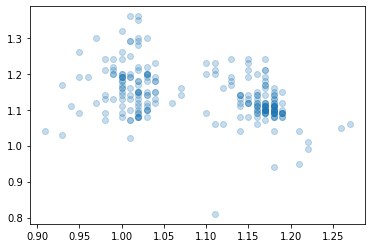

In [88]:
plt.scatter(y_ax1,z_ax1, alpha=.25)
plt.scatter(y_ax2,z_ax2, alpha=.25)
# plt.scatter(x_ax3,z_ax3, alpha=.25)
# plt.scatter(x_ax4,z_ax4, alpha=.25)
# plt.scatter(x_ax5,z_ax5, alpha=.25) 
# plt.scatter(x_ax_stand1,z_ax_stand1)


plt.show()

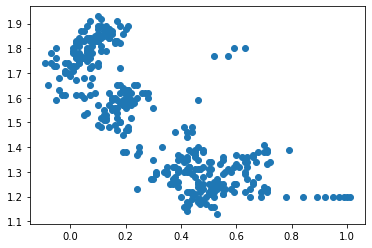

In [44]:
plt.scatter(x_ax_stand1,z_ax_stand1)
plt.show()

In [27]:
avg = [mean(z_ax),mean(z_ax2),mean(z_ax3),mean(z_ax4),mean(z_ax5)]
plus_avg = mean(avg)+np.std(avg)
minus_avg = mean(avg)-np.std(avg)
print(mean(avg))

print(max(z_ax_stand1)-min(z_ax_stand1))
print(plus_avg-minus_avg)

1.4035019218332248
0.8
0.18467659639074752


In [ ]:
minimum = [min(z_ax),min(z_ax2),min(z_ax3),min(z_ax4),min(z_ax5)]
maximum = [max(z_ax),max(z_ax2),max(z_ax3),max(z_ax4),max(z_ax5)]
sit_range = [(abs(np.std(minimum) - mean(minimum))),(abs(np.std(maximum)+mean(maximum)))]
print(np.std(minimum))
print(mean(minimum))
print(np.std(maximum))
print(mean(maximum))
print(sit_range[1]-sit_range[0])


In [6]:
avg_range = mean(z_ax_stand1)
print(avg_range)
if avg_range >= sit_range[0] or avg_range <= sit_range[1]:
    print("sitting")
else:
    print("not sitting")

1.5038147138964577
sitting


In [49]:
x_ax1 = []
y_ax1 = []
z_ax1 = []

for row in range (test1['TARGET_ID.1'].size):
    if test1['TARGET_ID.1'].values[row] >=0:
       x_ax1.append(test1['TARGET_X.1'].values[row])
       y_ax1.append(test1['TARGET_Y.1'].values[row])
       z_ax1.append(test1['TARGET_Z.1'].values[row])
    else:
        pass


In [50]:
type(test1['TIME_STAMP'][0])
test1['TIME_STAMP'] = pd.to_datetime(test1['TIME_STAMP'])

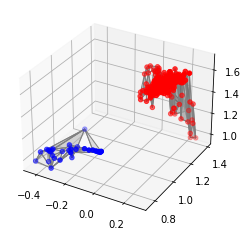

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(x_ax1,y_ax1,z_ax1, color='white', edgecolors='grey', alpha=.5)
ax.plot_trisurf(x_ax,y_ax,z_ax, color='white', edgecolors='grey', alpha=.5)
ax.scatter(x_ax,y_ax,z_ax, c='red')
ax.scatter(x_ax1,y_ax1,z_ax1, c='blue')

plt.show()

In [52]:
psudo_x = []
psudo_y = []
psudo_z = []

for row in range(test1['TARGET_ID'].size):
    psudo_x.append(rd.uniform(min(x_ax), max(x_ax)))
    psudo_y.append(rd.uniform(min(y_ax), max(y_ax)))
    psudo_z.append(rd.uniform(min(z_ax), max(z_ax)))

print(min(z_ax))
print(max(z_ax))

0.98
1.69


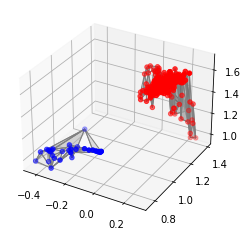

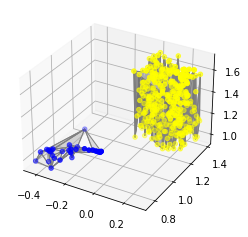

In [53]:
fig = plt.figure()
fig1 = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax1 = fig1.add_subplot(111, projection='3d')
ax.plot_trisurf(x_ax,y_ax,z_ax, color='white', edgecolors='grey', alpha=.5)
ax.plot_trisurf(x_ax1,y_ax1,z_ax1, color='white', edgecolors='grey', alpha=.5)
ax1.plot_trisurf(psudo_x,psudo_y,psudo_z, color='white', edgecolors='grey', alpha=.5)
ax1.plot_trisurf(x_ax1,y_ax1,z_ax1, color='white', edgecolors='grey', alpha=.5)
ax.scatter(x_ax,y_ax,z_ax, c='red')
ax.scatter(x_ax1,y_ax1,z_ax1, c='blue')
ax1.scatter(psudo_x,psudo_y,psudo_z, c='yellow')
ax1.scatter(x_ax1,y_ax1,z_ax1, c='blue')